In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
### Will - read data ###
data_1 = pd.read_csv(r'C:\Users\sherm\Documents\Grad School - Classes\MSDS - 7333 - Quantifying the World\Case Study 2\dataset_diabetes\diabetic_data.csv')
### Randy - read data ###
# data_1 = pd.read_csv("diabetic_data.csv")
### Kati - read data ###
# data_1 = 

print(data_1.shape)
print(data_1.columns)
data_1.head(10)

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data_1.isnull().any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
weight                      False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                  False
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [5]:
print(len(data_1[data_1['diag_1']=='?']))
print(len(data_1[data_1['diag_2']=='?']))
print(len(data_1[data_1['diag_3']=='?']))

21
358
1423


In [6]:
from collections import Counter

diag_1 = Counter(list(data_1['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(data_1['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(data_1['diag_3'])).most_common(1)[0][0]
data_1['diag_1'] = data_1['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
data_1['diag_2'] = data_1['diag_2'].apply(lambda x : diag_2 if x == '?' else x)
data_1['diag_3'] = data_1['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

# credit for above code goes to Sanchin Ranveer
# https://medium.com/analytics-vidhya/diabetes-130-us-hospitals-for-years-1999-2008-e18d69beea4d

In [7]:
print(len(data_1[data_1['weight']=='?']), 'out of', len(data_1['weight']))
print('weight values missing at {}%'.format(round(98569/101766*100, 2)))

98569 out of 101766
weight values missing at 96.86%


In [8]:
data_1 = data_1.drop(['weight'], axis=1)
data_1 = data_1.drop(['patient_nbr'], axis=1)

In [9]:
data_1 = data_1.replace('?', np.NaN)

In [10]:
data_1.isnull().any()

encounter_id                False
race                         True
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide     

In [11]:
# List of vectors with np.NaN values that need to be imputed

vectors_w_NAs = data_1.columns[data_1.isnull().any()].tolist()
print(vectors_w_NAs)

['race', 'payer_code', 'medical_specialty']


In [12]:
print(len(data_1[data_1['gender']=='Unknown/Invalid']))
data_1_update = data_1.drop(index = data_1[data_1['gender']=='Unknown/Invalid'].index)

3


<BarContainer object of 80 artists>

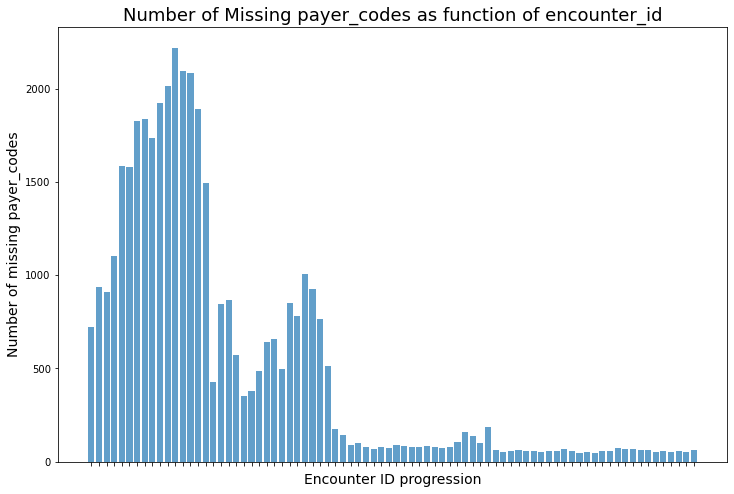

In [13]:
# Missing Not At Random for Payer Code
sorted_df = data_1_update.sort_values(by=['encounter_id'])
sorted_df['bins'] = pd.cut(data_1_update['encounter_id'], 80)
sorted_df['na_counts'] = sorted_df['payer_code'].isnull()

grouped = sorted_df.groupby(sorted_df['bins'], as_index=False).sum()
x = grouped['bins'].astype(str)
y = grouped['na_counts']

fig, ax = plt.subplots(figsize=(12,8))
plt.xlabel('Encounter ID progression', fontsize=14)
plt.ylabel('Number of missing payer_codes', fontsize=14)
plt.title('Number of Missing payer_codes as function of encounter_id', fontsize=18)
ax.set_xticklabels([])
plt.bar(x, y, alpha=.7)


In [14]:
data_1_update['diag_1'] = data_1_update['diag_1'].str.split('.').str[0]
data_1_update['diag_2'] = data_1_update['diag_2'].str.split('.').str[0]
data_1_update['diag_3'] = data_1_update['diag_3'].str.split('.').str[0]

In [15]:
def setall(d, keys, value):
    for k in keys:
        d[k] = value

numeric_codes = {}
setall(numeric_codes, range(1, 140), 'INFECTIOUS AND PARASITIC DISEASES')
setall(numeric_codes, range(140, 240), 'NEOPLASMS')
setall(numeric_codes, range(240, 280), 'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS')
setall(numeric_codes, range(280, 290), 'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS')
setall(numeric_codes, range(290, 320), 'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS')
setall(numeric_codes, range(320, 390), 'DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS')
setall(numeric_codes, range(390, 460), 'DISEASES OF THE CIRCULATORY SYSTEM')
setall(numeric_codes, range(460, 520), 'DISEASES OF THE RESPIRATORY SYSTEM')
setall(numeric_codes, range(520, 580), 'DISEASES OF THE DIGESTIVE SYSTEM')
setall(numeric_codes, range(580, 630), 'DISEASES OF THE GENITOURINARY SYSTEM')
setall(numeric_codes, range(630, 680), 'COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM')
setall(numeric_codes, range(680, 710), 'DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE')
setall(numeric_codes, range(710, 740), 'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE')
setall(numeric_codes, range(740, 760), 'CONGENITAL ANOMALIES')
setall(numeric_codes, range(760, 780), 'CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD')
setall(numeric_codes, range(780, 800), 'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS')
setall(numeric_codes, range(800, 1000), 'INJURY AND POISONING')

def new_setall(d, letter, keys, value):
    for k in keys:
        d[letter + str(k)] = value

extra_codes={250: 'DIABETES RELATED'}

new_setall(extra_codes, 'E', range(800,999), 'OTHER EXTERNAL CAUSES OF INJURY OR POISONING')
new_setall(extra_codes, 'V0', range(1,10), 'HEALTH HAZARD - COMMUNICABLE DISEASE')
new_setall(extra_codes, 'V', range(10,40), 'FAMILY HISTORY OR REPRODUCTIVE DEVELOPMENT ISSUE')
new_setall(extra_codes, 'V', range(40,50), 'NERVE/BRAIN ISSUES, ORGAN TRANSPLANT, MACHINE SUPPORT, OTHER')
new_setall(extra_codes, 'V', range(50,60), 'POST-PROCEDURE CARE')
new_setall(extra_codes, 'V', range(60,70), 'ECONOMIC, FAMILY, CONVALESCENCE, PALLIATIVE CARE OR FOLLOW-UP EXAM')
new_setall(extra_codes, 'V', range(70,90), 'GENETICS, HORMONAL, UNREPORTED DIAGNOSIS, OTHER')
new_setall(extra_codes, 'V', range(90,99), 'MULTIPLE GESTATION PLACENTA STATUS')

# diagnoses_codes = numeric_codes | extra_codes

In [16]:
diagnoses_codes = {**numeric_codes, **extra_codes}

In [17]:
def transform_bad_vals(vector):
    for ind, code in vector.iteritems():
        try:
            code = int(code)
            if code not in diagnoses_codes.keys():
                raise ValueError('Incorrect key-value provided: {} {}'.format(ind, code))
            else:
                vector[ind] = diagnoses_codes[code]
        except:
            if code not in diagnoses_codes.keys():
                raise ValueError('Other error: {} {}'.format(ind, code))
            else:
                vector[ind] = diagnoses_codes[code]
    return vector

In [18]:
pd.options.mode.chained_assignment = None  # default='warn'

data_1_update['diag_1'] = transform_bad_vals(data_1_update['diag_1'])
data_1_update['diag_2'] = transform_bad_vals(data_1_update['diag_2'])
data_1_update['diag_3'] = transform_bad_vals(data_1_update['diag_3'])

data_1_update.loc[:, ['diag_1','diag_2','diag_3']].head()

,diag_1,diag_2,diag_3
0,DIABETES RELATED,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES,...",DIABETES RELATED
1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES,...",DIABETES RELATED,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES,..."
2,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...",DIABETES RELATED,FAMILY HISTORY OR REPRODUCTIVE DEVELOPMENT ISSUE
3,INFECTIOUS AND PARASITIC DISEASES,DIABETES RELATED,DISEASES OF THE CIRCULATORY SYSTEM
4,NEOPLASMS,NEOPLASMS,DIABETES RELATED


In [19]:
set(data_1_update['admission_type_id'])

{1, 2, 3, 4, 5, 6, 7, 8}

In [20]:
### Will - read data ###
data_2 = pd.read_csv(r'C:\Users\sherm\Documents\Grad School - Classes\MSDS - 7333 - Quantifying the World\Case Study 2\dataset_diabetes\IDs_mapping.csv')
### Randy - read data ###
# data_2 = pd.read_csv("IDs_mapping.csv")
### Kati - read data ###
# data_2 = 

pd.set_option('display.max_rows', 70)
print(data_2.shape)
print(data_2.columns)
data_2
### Frick this data it's messy *ugh* ###
### Original csv has weird formatting, extra spaces

(67, 2)
Index(['admission_type_id', 'description'], dtype='object')


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [21]:
admission_type_id = data_2.iloc[0:8, :]
discharge_disposition_id = data_2.iloc[10:40, :]
admission_source_id = data_2.iloc[42:, :]

In [22]:
admission_type_id.head(10)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [23]:
discharge_disposition_id.rename(columns={'admission_type_id':'discharge_disposition_id'}, inplace=True)
discharge_disposition_id.head(10)

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [24]:
discharge_disposition_id.rename(columns={'admission_type_id':'discharge_disposition_id'}, inplace=True)
discharge_disposition_id.head(10)

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [25]:
admission_source_id.rename(columns={'admission_type_id':'admission_source_id'}, inplace=True)
admission_source_id

,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


### Still need to finish transforming
##### The *admission_type_id*, *discharge_disposition_id*, *admission_source_id* in the original dataframe to categorical values
##### (See Above)

In [26]:
# # Randy
# what = []
# for i in range(0,len(data_1)):
#     try:
#         data_1["admission_type_id"].iloc[i] = admission_type_id["description"].iloc[int(data_1["admission_type_id"].iloc[i]-1)]
#         data_1["discharge_disposition_id"].iloc[i] =discharge_disposition_id["description"].iloc[int(data_1["discharge_disposition_id"].iloc[i]-1)]
#         data_1["admission_source_id"].iloc[i] = admission_source_id["description"].iloc[int(data_1["admission_source_id"].iloc[i]-1)]
#     except:
#         what.append(i)
#         continue

In [27]:
# Randy
data_1_clean = data_1_update.copy()

In [28]:
data_1_clean['diag_1']

0                                          DIABETES RELATED
1         ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES,...
2         COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...
3                         INFECTIOUS AND PARASITIC DISEASES
4                                                 NEOPLASMS
                                ...                        
101761                                     DIABETES RELATED
101762                     DISEASES OF THE DIGESTIVE SYSTEM
101763                    INFECTIOUS AND PARASITIC DISEASES
101764                                 INJURY AND POISONING
101765                     DISEASES OF THE DIGESTIVE SYSTEM
Name: diag_1, Length: 101763, dtype: object

In [29]:
# Randy
colname = list(data_1_clean.columns)
mia = []

for i in range(len(data_1_clean.columns)):
  count = data_1_clean[data_1_clean.columns[i]].isna().sum()
  if count > 0:
    mia.append(data_1_clean.columns[i])
    print("Column '{col}' has {ct} NAs".format(col = colname[i], ct = count))

Column 'race' has 2271 NAs
Column 'payer_code' has 40255 NAs
Column 'medical_specialty' has 49947 NAs


### Still need to finish imputation
##### (See Below)

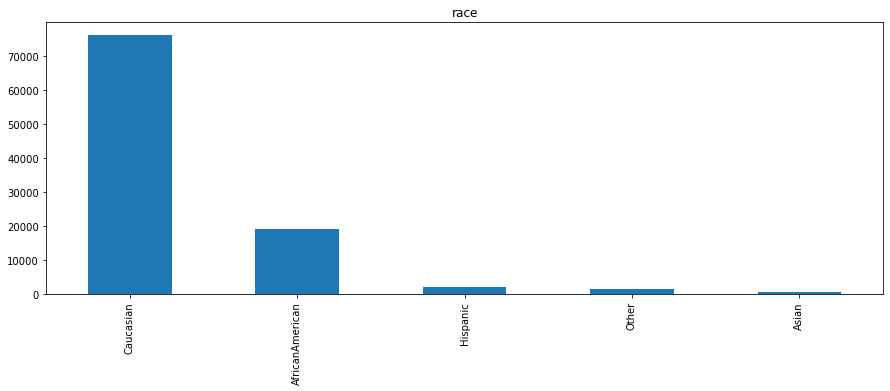

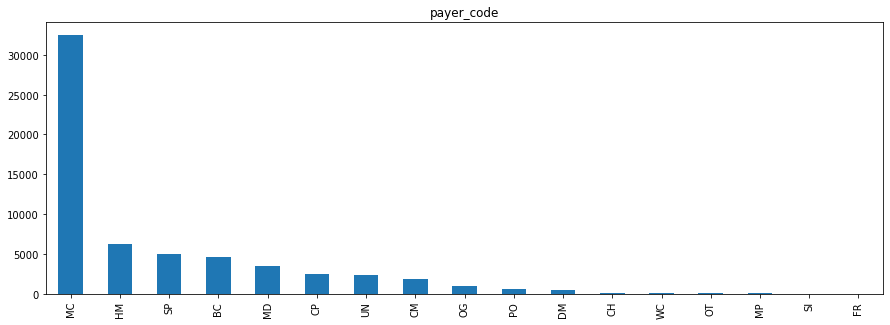

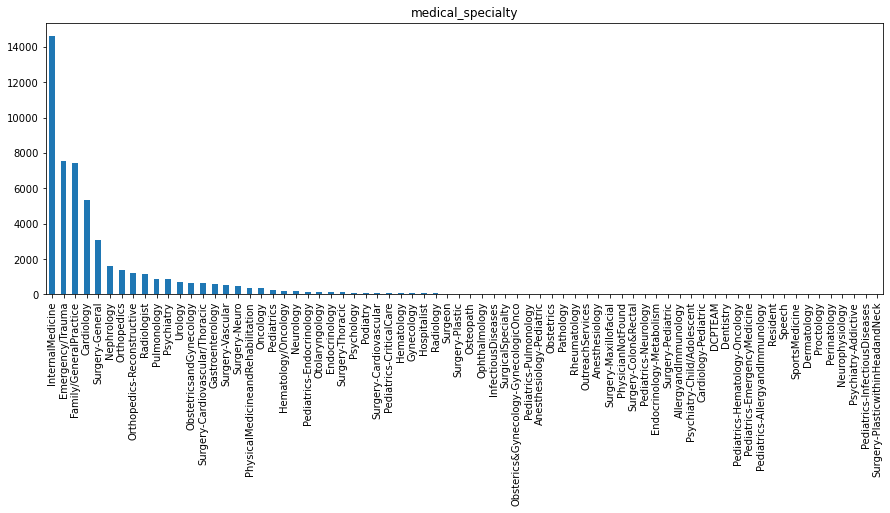

In [30]:
# Randy
for i in mia:
    plt.figure(figsize=(15,5))
    data_1_clean[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

In [31]:
data_1_clean["race"] = data_1_clean["race"].fillna('Caucasian')
data_1_clean["admission_type_id"] = data_1_clean["admission_type_id"].fillna('Emergency')
data_1_clean["discharge_disposition_id"] = data_1_clean["discharge_disposition_id"].fillna('Discharged to home')
data_1_clean["medical_specialty"] = data_1_clean["medical_specialty"].fillna('InternalMedicine')
data_1_clean["payer_code"] = data_1_clean["payer_code"].fillna('MC')

In [32]:
# Randy
colname = list(data_1_clean.columns)
mia = []

for i in range(len(data_1_clean.columns)):
  count = data_1_clean[data_1_clean.columns[i]].isna().sum()
  if count > 0:
    mia.append(data_1_clean.columns[i])
    print("Column '{col}' has {ct} NAs".format(col = colname[i], ct = count))

if mia:
    print("There are missing values")
else:
    print("All gucci")

All gucci


In [33]:
data_1_clean.head(10)

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,Caucasian,Female,[10-20),1,1,7,3,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,Caucasian,Male,[30-40),1,1,7,2,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,Caucasian,Male,[40-50),1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,Caucasian,Male,[50-60),2,1,2,3,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,Caucasian,Male,[60-70),3,1,2,4,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,Caucasian,Male,[70-80),1,1,7,5,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,Caucasian,Female,[80-90),2,1,4,13,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,Caucasian,Female,[90-100),3,3,4,12,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### MODELING (and Setup) ###

In [34]:
x0_data = data_1_clean.drop(['readmitted'], axis=1)
y0_data = data_1_clean.loc[:, 'readmitted']

column_cats = [col  for col, dt in x0_data.dtypes.items() if dt == object]
column_cats

model_data = pd.get_dummies(x0_data, prefix=column_cats)
print(len(model_data.columns))
model_data

273


,encounter_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2278392,6,25,1,1,41,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
1,149190,1,1,7,3,59,0,18,0,0,...,1,0,1,0,1,0,1,0,0,1
2,64410,1,1,7,2,11,5,13,2,0,...,1,0,1,0,1,0,0,1,0,1
3,500364,1,1,7,2,44,1,16,0,0,...,1,0,1,0,1,0,1,0,0,1
4,16680,1,1,7,1,51,0,8,0,0,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,1,3,7,3,51,0,16,0,0,...,1,0,1,0,1,0,1,0,0,1
101762,443847782,1,4,5,5,33,3,18,0,0,...,1,0,1,0,1,0,0,1,0,1
101763,443854148,1,1,7,1,53,0,9,1,0,...,1,0,1,0,1,0,1,0,0,1
101764,443857166,2,3,7,10,45,2,21,0,0,...,1,0,1,0,1,0,1,0,0,1


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
column_nums = [x for x in model_data.columns if x not in column_cats]

# column_nums
model_data[column_nums].head(2)

,encounter_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2278392,6,25,1,1,41,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
1,149190,1,1,7,3,59,0,18,0,0,...,1,0,1,0,1,0,1,0,0,1


In [37]:
x_scaled = model_data.copy()
x_scaled[column_nums] = scaler.fit_transform(x_scaled[column_nums])
# x_scaled = pd.DataFrame(x_scaled, columns=x_data.columns)
x_scaled[column_nums].head()

,encounter_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,-1.587311,2.750771,4.031234,-1.169871,-1.137665,-0.106531,-0.785382,-1.848261,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,-0.926579,0.926579,1.829884,-1.829884
1,-1.608055,-0.708463,-0.514313,0.306475,-0.467666,0.808376,-0.785382,0.243390,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483
2,-1.608881,-0.708463,-0.514313,0.306475,-0.802665,-1.631377,2.145823,-0.371802,1.286722,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,-0.926579,0.926579,-0.546483,0.546483
3,-1.604634,-0.708463,-0.514313,0.306475,-0.802665,0.045953,-0.199141,-0.002687,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483
4,-1.609346,-0.708463,-0.514313,0.306475,-1.137665,0.401751,-0.785382,-0.986993,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483


In [38]:
x_scaled

,encounter_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,-1.587311,2.750771,4.031234,-1.169871,-1.137665,-0.106531,-0.785382,-1.848261,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,-0.926579,0.926579,1.829884,-1.829884
1,-1.608055,-0.708463,-0.514313,0.306475,-0.467666,0.808376,-0.785382,0.243390,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483
2,-1.608881,-0.708463,-0.514313,0.306475,-0.802665,-1.631377,2.145823,-0.371802,1.286722,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,-0.926579,0.926579,-0.546483,0.546483
3,-1.604634,-0.708463,-0.514313,0.306475,-0.802665,0.045953,-0.199141,-0.002687,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483
4,-1.609346,-0.708463,-0.514313,0.306475,-1.137665,0.401751,-0.785382,-0.986993,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,2.714784,-0.708463,-0.135517,0.306475,-0.467666,0.401751,-0.785382,-0.002687,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483
101762,2.714786,-0.708463,0.053881,-0.185640,0.202334,-0.513157,0.973341,0.243390,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,-0.926579,0.926579,-0.546483,0.546483
101763,2.714848,-0.708463,-0.514313,0.306475,-1.137665,0.503407,-0.785382,-0.863955,0.497628,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483
101764,2.714877,-0.016616,-0.135517,0.306475,1.877332,0.096781,0.387100,0.612505,-0.291466,-0.212623,...,0.003135,-0.003135,0.004433,-0.004433,0.003135,-0.003135,1.079238,-1.079238,-0.546483,0.546483


In [39]:
y_data = y0_data.copy()

In [40]:
y_data.head()

0     NO
1    >30
2     NO
3     NO
4     NO
Name: readmitted, dtype: object

In [41]:
# LABELS FOR OUTCOMES
y_data.loc[y_data == '<30'] = 1
y_data.loc[y_data == '>30'] = 0
y_data.loc[y_data == 'No'] = 0
y_data.loc[y_data == 'NO'] = 0
y_data = y_data.astype('int')

In [42]:
y_data.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: readmitted, dtype: int32

### Actual Modeling ###

In [64]:
# train/test/split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2, random_state=1)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

folder = KFold(shuffle=True, n_splits=10)
log_reg = LogisticRegression(penalty = 'l2')

In [45]:
c_vals = np.logspace(-10,10,100)
cs_for_plots = []
best = -10000000000
best_c = 'error'

for i in c_vals:
    log_reg.C = i
    out = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=folder, n_jobs=10).mean()
    cs_for_plots.append([i,out])
    
    if(out > best):
        best = out
        best_c = i

print('\tbest accuracy\t\tbest C\n',best, '\t', best_c)

	best MSE		bestalpha
 0.888153693699059 	 0.0002915053062825176


In [65]:
model = LogisticRegression(penalty = 'l2', C=best_c).fit(X_train, y_train)
train_preds = model.predict(X_train)
train_score = accuracy_score(train_preds, y_train)
train_score

0.8886254759857511

In [66]:
test_preds = model.predict(X_test)
test_score = accuracy_score(test_preds, y_test)
test_score

0.8879280695720533

In [67]:
train_verify = []
test_verify = []
for state in range(100,745,15):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2, random_state=state)
    model = LogisticRegression(penalty = 'l2', C=best_c).fit(X_train, y_train)
    train_preds = model.predict(X_train)
    train_verify.append(accuracy_score(train_preds, y_train))
    test_preds = model.predict(X_test)
    test_verify.append(accuracy_score(test_preds, y_test))

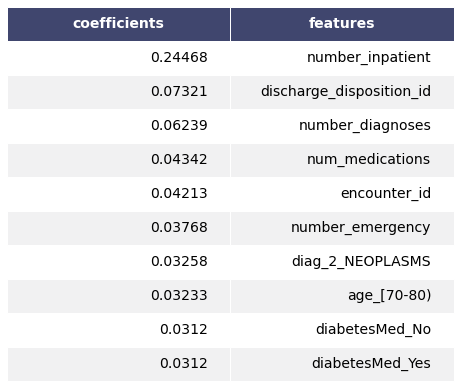

In [57]:
import six

feature_df = pd.DataFrame({'coefficients':abs(model.coef_.flatten()),
                        'features':X_train.columns})
top10 = feature_df.sort_values('coefficients', ascending=False).head(10)
top10 = top10.round({'coefficients':5})

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(top10, header_columns=0, col_width=4.0)
fig.savefig("table_mpl.png")

# credit to volodymyr: https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure

C:\Users\sherm\AppData\Local\Temp/ipykernel_9824/4053078132.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  L_features = L_features.astype(np.bool)


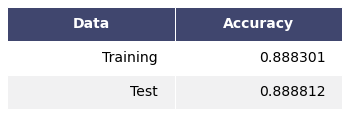

In [63]:
L_features = abs(model.coef_.flatten())
L_features = (L_features > 0.000001).astype(int)
L_features = L_features.astype(np.bool)

model_metrics = pd.DataFrame({'Data':['Training','Test'],
                              'Accuracy':[train_score,test_score]})
# model_metrics
model_metrics = model_metrics.round({'Accuracy':6})
fig,ax = render_mpl_table(model_metrics, header_columns=0, col_width=3.0)
fig.savefig("metrics_tbl.png")

In [76]:
test_verify.sort()
len(test_verify)

43

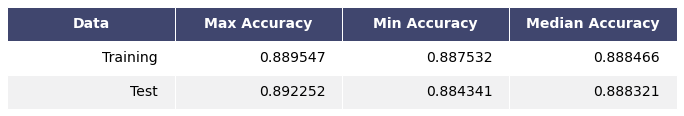

In [75]:
from statistics import median

random_competition = pd.DataFrame({'Data':['Training','Test'],
                                   'Max Accuracy':[max(train_verify), max(test_verify)],
                                   'Min Accuracy':[min(train_verify), min(test_verify)],
                                   'Median Accuracy':[median(train_verify), median(test_verify)]})

random_competition = random_competition.round({'Max Accuracy':6,
                                               'Min Accuracy':6,
                                               'Median Accuracy':6})
fig,ax = render_mpl_table(random_competition, header_columns=0, col_width=3.0)
fig.savefig("final_tbl.png")